<a href="https://colab.research.google.com/github/rozhrafiee/socialnetwork/blob/main/social_networks1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of nodes: 34
Number of edges: 78
List of nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
List of edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


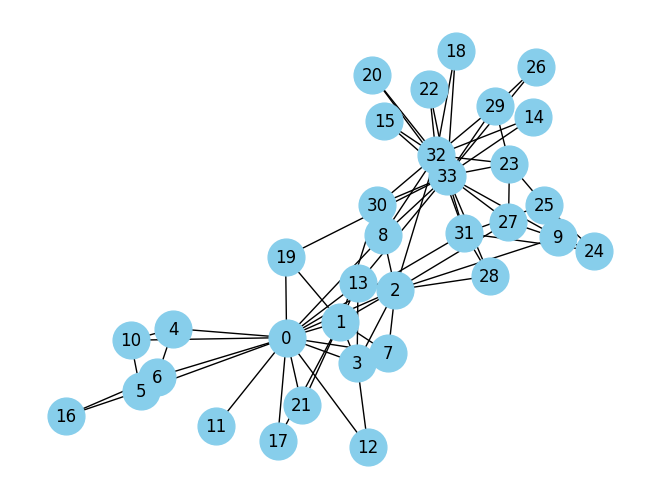

List of neighbors mr_hi: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]


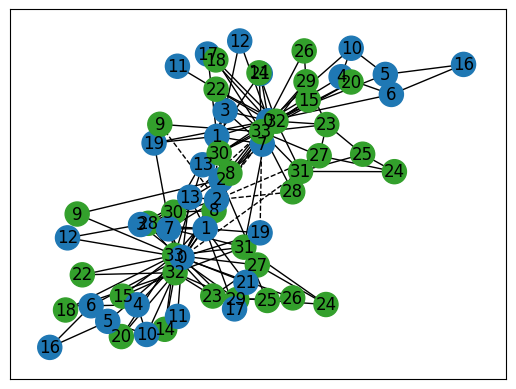

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Load Zachary's Karate Club dataset
G = nx.karate_club_graph()

# Display basic graph information
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# List nodes and edges
print("List of nodes:", list(G.nodes))
print("List of edges:", list(G.edges))

# Visualize the graph
nx.draw(G, with_labels=True, node_color="skyblue", node_size=700)
plt.show()

#3 approaches to check whether we have mr_hi node or not

#1
mr_hi = 0
mr_hi in G

#2
G.has_node(mr_hi)

#3
mr_hi in G.nodes

#accessing to neighbors of a node
print("List of neighbors mr_hi:", list(G.neighbors(mr_hi)))

#dividing the members of Zakari karate club into two groups 0 and 1
#this code is for adding an attribute(property) to each node
member_club = [
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1]
for node_id in G.nodes:
  G.nodes[node_id]['club'] = member_club[node_id]

node_colors = ['#1f78b4' if G.nodes[v]['club'] == 0 else '#33a02c' for v in G]
nx.draw_networkx(G, with_labels=True, node_color = node_colors)

# Assign 'internal' property to edges
for v, w in G.edges:
    # Compare 'club' property of edge endpoints
    # Set 'internal' property to True if they match, False otherwise
    if G.nodes[v]['club'] == G.nodes[w]['club']:
        G.edges[v, w]['internal'] = True
    else:
        G.edges[v, w]['internal'] = False

# Classify edges as internal or external
internal = [e for e in G.edges if G.edges[e]['internal']]
external = [e for e in G.edges if not G.edges[e]['internal']]

# Define layout for nodes
k_pos = nx.spring_layout(G)

# Draw nodes and node labels
nx.draw_networkx_nodes(G, k_pos, node_color=node_colors)
nx.draw_networkx_labels(G, k_pos)  # Correct label drawing function

# Draw internal edges as solid lines
nx.draw_networkx_edges(G, k_pos, edgelist=internal)

# Draw external edges as dashed lines
nx.draw_networkx_edges(G, k_pos, edgelist=external, style="dashed")




